<a href="https://colab.research.google.com/github/PraeJi/Python-Practice/blob/master/pipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Pipeline

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Diabetes Dataset

This is a regression task to predict a quantitative measure of disease progression one year after baseline from 10 features

In [2]:
from sklearn.datasets import load_diabetes

D = load_diabetes(scaled=False)
print(D['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [3]:
X, y = D['data'], D['target']

In [4]:
# Exploring the feature
X

array([[59.    ,  2.    , 32.1   , ...,  4.    ,  4.8598, 87.    ],
       [48.    ,  1.    , 21.6   , ...,  3.    ,  3.8918, 69.    ],
       [72.    ,  2.    , 30.5   , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [60.    ,  2.    , 24.9   , ...,  3.77  ,  4.1271, 95.    ],
       [36.    ,  1.    , 30.    , ...,  4.79  ,  5.1299, 85.    ],
       [36.    ,  1.    , 19.6   , ...,  3.    ,  4.5951, 92.    ]])

In [5]:
# Exploring the targets
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
# Spliting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Create a pipeline with StandardScaler and KNeighborsRegressor

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsRegressor(n_neighbors=5))
])

In [9]:
# Training the pipeline
pipe.fit(X_train, y_train)
acc_train = pipe.score(X_train, y_train)
print(f'Training R^2: {acc_train:.4f}')

Training R^2: 0.6097


In [10]:
# Assessing the pipeline
acc_test = pipe.score(X_test, y_test)
print(f'Test R^2: {acc_test:.4f}')

Test R^2: 0.2855


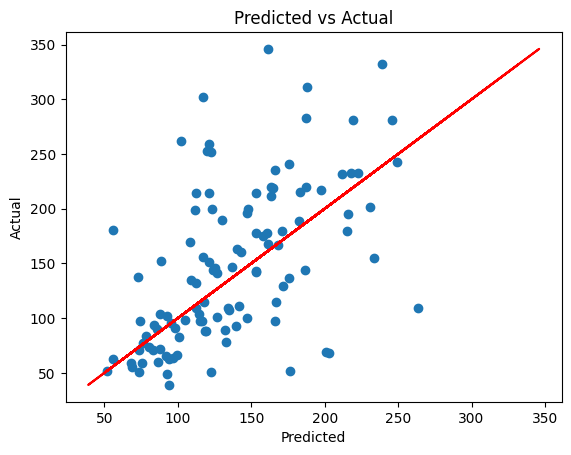

In [11]:
y_pred = pipe.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

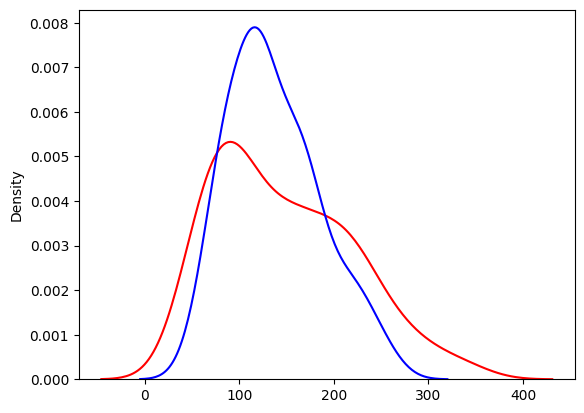

In [12]:
ax = sns.kdeplot(y_test, color='r', label='Actual')
ax = sns.kdeplot(y_pred, color='b', label='Predicted')

# Finding feature importances using ExtraTreesRegressor

In [13]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor(n_estimators=1000, max_depth=5, random_state=1)

In [16]:
# Training the pipeline
et.fit(X_train, y_train)
acc_train_et = et.score(X_train, y_train)
print(f'Training R^2: {acc_train_et:.4f}')

Training R^2: 0.6852


In [17]:
# Assessing the pipeline
acc_test_et = et.score(X_test, y_test)
print(f'Test R^2: {acc_test_et:.4f}')

Test R^2: 0.3620


# Assessing feature importance

<BarContainer object of 10 artists>

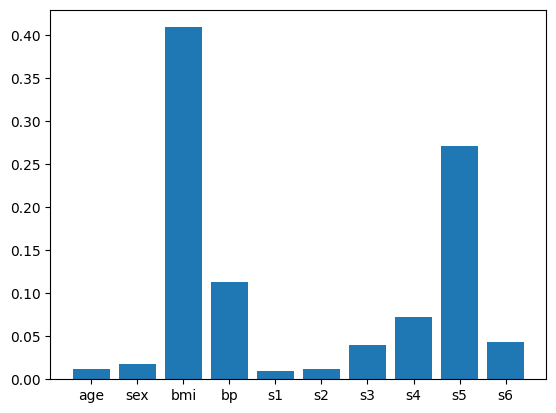

In [19]:
feature_importances = et.feature_importances_
plt.bar(D['feature_names'], feature_importances)

# Exercise: Create a pipeline with the following steps

1. SelectFromModel to select 7 features based on pre-calculated importances from et
2. StandardScaler
3. KNeighborsRegressor with n_neighbors=5

In [20]:
from sklearn.feature_selection import SelectFromModel

pipe_sel = Pipeline([
    ('selector', SelectFromModel(et, prefit=True, max_features=7, threshold=-np.inf)),
    ('scaler', StandardScaler()),
    ('clf', KNeighborsRegressor(n_neighbors=5))
])

In [21]:
# Training the pipeline
pipe_sel.fit(X_train, y_train)
acc_train_sel = pipe_sel.score(X_train, y_train)
print(f'Training R^2: {acc_train_sel:.4f}')

Training R^2: 0.6037


In [22]:
# Assessing the pipeline
acc_test_sel = pipe_sel.score(X_test, y_test)
print(f'Test R^2: {acc_test_sel:.4f}')

Test R^2: 0.3631


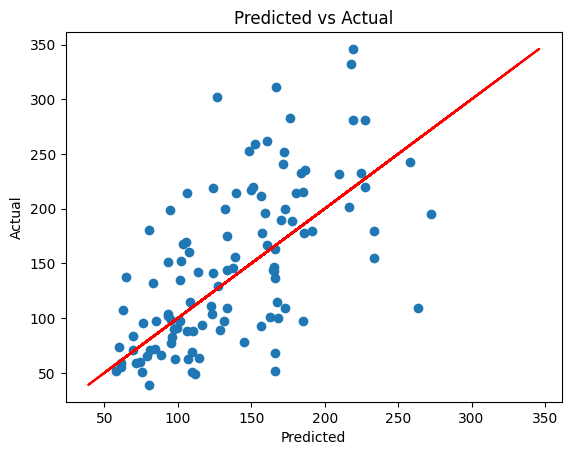

In [24]:
y_pred_sel = pipe_sel.predict(X_test)
plt.scatter(y_pred_sel, y_test)
plt.plot(y_test, y_test, c='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

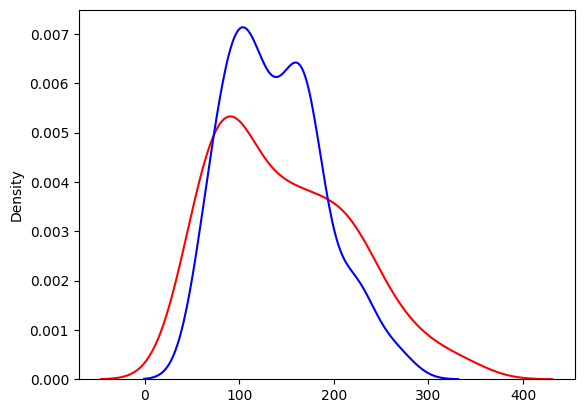

In [25]:
ax = sns.kdeplot(y_test, color='r', label='Actual')
ax = sns.kdeplot(y_pred_sel, color='b', label='Predicted')